In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None)
df_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None)

combine = pd.concat([df_train, df_test])

y_train = np.array(pd.read_csv('train/y_train.txt', header=None)).ravel()
y_test = np.array(pd.read_csv('test/y_test.txt', header=None)).ravel()
df_train.shape, df_test.shape, combine.shape

# PRE-PROCESSING :
It is a good practice to perform feature scaling and mean normalization before applying models like Logistic Regression, SVM, etc. 

In [14]:
stdScaler = StandardScaler()
X = stdScaler.fit_transform(combine.values)
X_train = stdScaler.fit_transform(df_train.values)
X_test = stdScaler.fit_transform(df_test.values)

# Visualizing Output Labels

[0, 2, 4, 6, 8, 10]

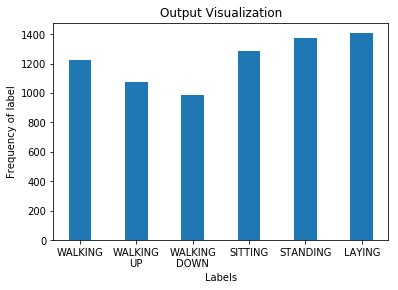

In [5]:
labels = ['WALKING', 'WALKING\nUP', 'WALKING\nDOWN', 'SITTING', 'STANDING', 'LAYING']
# x_labels = np.arange(len(labels))
x_labels = [i for i in range(0, 11, 2)]
display(x_labels)
freq = [0 for i in range(len(labels))]
for i in range(len(labels)) :
    freq[i] = sum(y_train == i+1)
    
plt.bar(x_labels, freq)
plt.xticks(x_labels, labels)
plt.xlabel("Labels")
plt.ylabel("Frequency of label")
plt.title("Output Visualization")

plt.show()

Should we use PCA ?
====================
Since, the dataset contains 10299 instances and 561 attributes. The number of attributes is quite high so it might take time to train the model. Also, large number of attributes can lead to Overfitting. If the model overfits because of large number of attributes, we can use **Principal Component Analysis** (PCA) to reduce the number of attributes so that the model will contain new useful features. But when i trained my model on Logistic, SVM and Random Forest, i observed that the Training Score and Test Score is quite close. It means that our model performs equally good on Training Set and Test Set. This implies that our model do not Overfit, so we do not need to apply PCA here. We can verify that PCA will not increase the Test Score. Before applying PCA, we need to perform Data Centralization. Data centralization is a major step before applying PCA to a Training Set. On applying PCA for the model with variance 0.9, we observe that around only 63 principal components are required and with variance 0.85, around only 40 principal components are required. We will stick with 0.85 variance as a thumb of rule (it is observed that variance "0.85" often suits many models quite well).

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85, random_state=42) 
pca = pca.fit(X_train)
Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)

Xtrain_pca.shape

(7352, 40)

We can see that the first principal component accounts for 0.5 variance, (first+second) principal components accounts for 0.57 variance and this gradually decreases further.

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284534, 0.67655545, 0.68854623, 0.69850482, 0.70815569,
       0.7167562 , 0.72475901, 0.73239898, 0.73885227, 0.74517551,
       0.75117273, 0.75704023, 0.76279431, 0.76847352, 0.77374648,
       0.77875011, 0.78363419, 0.78841625, 0.79310188, 0.79759477,
       0.80180504, 0.80598483, 0.81004053, 0.81392577, 0.81779595,
       0.82145554, 0.82500108, 0.8284805 , 0.83185237, 0.83514914,
       0.83843129, 0.84163659, 0.84459274, 0.84745996, 0.85031071])

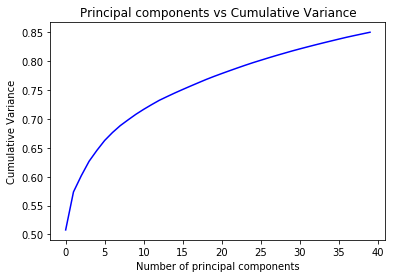

In [10]:
pca_csum = pca.explained_variance_ratio_.cumsum()
display(pca_csum)
pca_csum_list = []
for i in range(len(pca_csum)) :
    pca_csum_list.append(pca_csum[i])
plt.plot(pca_csum_list, 'b')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative Variance")
plt.title("Principal components vs Cumulative Variance")
plt.show()

To use the models implement below with pca, do the following in the cell below :
- Rename X_train2 to X_train
- Rename X_test2 to X_test

In [11]:
stdScaler = StandardScaler()
X_train2 = stdScaler.fit_transform(Xtrain_pca)
X_test2 = stdScaler.transform(Xtest_pca)
X_train2.shape, X_test2.shape

((7352, 40), (2947, 40))

# Logistic Regression 
Here, we are using Logistic Regression with "liblinear" solver. LIBLINEAR is an open source library for large-scale linear classification. Logistic Regression is performing really great with 96.87% accuracy in Test Set.

### Using Liblinear as *solver*

For multiclass problems, **Liblinear** uses one-versus-rest schemes.

0.001 0.9453210010881393
0.001 0.9433322022395657
-------------------------
0.003 0.963139281828074
0.003 0.9565659993213438
-------------------------
0.006 0.9715723612622416
0.006 0.9616559212758737
-------------------------
0.01 0.9760609357997824
0.01 0.9626739056667798
-------------------------
0.03 0.9831338411316648
0.03 0.9643705463182898
-------------------------
0.06 0.986126224156692
0.06 0.9640312181879878
-------------------------
0.1 0.9883025027203483
0.1 0.9657278588394977
-------------------------
0.3 0.9912948857453754
0.3 0.9653885307091958
-------------------------
0.6 0.9930631120783461
0.6 0.9643705463182898
-------------------------
1 0.9945593035908596
1 0.9643705463182898
-------------------------
Optimal C =  0.1
Training score by Logistic Regression (liblinear) :  0.9883025027203483
Test score by Logistic Regression (liblinear) :  0.9657278588394977


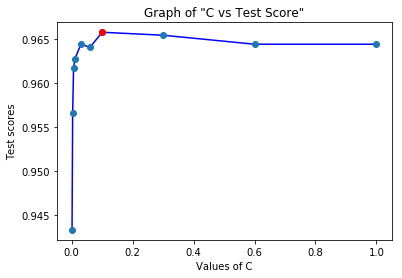

In [25]:
from sklearn.linear_model import LogisticRegression

d=[0.001, 0.003, 0.006, 0.01,0.03,0.06,0.1,0.3,0.6, 1]
max_train = 0
max_test = 0
optimalC = d[0]
c_list = []
for i in d:
    
    clf = LogisticRegression(C=i, penalty='l2', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    print(i, score_train)
    print(i, score_test)
    print('-'*25)
    
    c_list.append(score_test)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training score by Logistic Regression (liblinear) : ", max_train)
print("Test score by Logistic Regression (liblinear) : ", max_test)
plt.plot(d, c_list, 'b', d, c_list, 'o')
plt.plot(d[d.index(optimalC)], c_list[d.index(optimalC)], 'ro')
plt.xlabel("Values of C")
plt.ylabel("Test scores")
plt.title("Graph of \"C vs Test Score\"")
plt.show()

### Output of Logistic Regression without PCA
```
Optimal C =  0.1
Training score by Logistic Regression (liblinear) :  0.9883025027203483 (approx)
Test score by Logistic Regression (liblinear) :  0.9657278588394977 (approx)
```
### Output of Logistic Regression with PCA
```
Optimal C =  1
Training score by Logistic Regression (liblinear) :  0.9333514689880305 (approx)
Test score by Logistic Regression (liblinear) :  0.9182219205972175 (approx)
```
# Observation 
Clearly, Result without PCA is quite better than that with PCA. Also, Training score and test score are quite close as well. So, the decision of not using PCA was not wrong. I also tried with other different models like SVM, Random Forest, etc. with PCA and without PCA and each case, not using PCA was the optimal choice. So, from now on, we will not consider the case of using PCA.

 # SVM 
 SVC is a classical Classification Algorithm. It is applied in many classification problem and it performs quite well in both Training set and Test set. In our case, it is performing really good giving accuracy of 0.96 in Test Set, but still overfitting to some extend. When i tried to reduce the overfitting by choosing small value of C, the Test score also went down.

In [20]:
from sklearn.svm import SVC

max_train = 0
max_test = 0
svc_list = [1] + [i for i in range(5, 51, 5)]
optimalC = svc_list[0]
for i in svc_list:
    
    clf = SVC(C=i, kernel='rbf', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    print(i, score_train)
    print(i, score_test)
    print('-'*25)
    
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training Score by SVM : ", max_train)
print("Test Score by SVM : ", max_test)

1 0.9866702937976061
1 0.9565659993213438
-------------------------
5 0.9959194776931447
5 0.9602986087546658
-------------------------
10 0.9980957562568009
10 0.9596199524940617
-------------------------
15 0.998911860718172
15 0.9599592806243638
-------------------------
20 0.999727965179543
20 0.9589412962334578
-------------------------
25 1.0
25 0.9586019681031558
-------------------------
30 1.0
30 0.9586019681031558
-------------------------
35 1.0
35 0.9596199524940617
-------------------------
40 1.0
40 0.9606379368849678
-------------------------
45 1.0
45 0.9606379368849678
-------------------------
50 1.0
50 0.9606379368849678
-------------------------
Optimal C =  40
Training Score by SVM :  1.0
Test Score by SVM :  0.9606379368849678


In [24]:
from sklearn.ensemble import RandomForestClassifier
max_train = 0
max_test = 0
optimalDepth = 7
optimalEstimator = 10
for depth in [7, 8, 9] :
    for estimator in range(5, 51, 5) :
        model_rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=42)
        model_rfc.fit(X_train, y_train)
        score_train = model_rfc.score(X_train, y_train)
        score_test = model_rfc.score(X_test, y_test)
#         print("Training Score for %d and %d ", depth, estimator, " : ", train_score)
#         print("Validation Score for %d and %d ", depth, estimator," : ", val_score)
        if(max_test < score_test) :
            max_test = score_test
            max_train = score_train
            optimalDepth = depth
            optimalEstimator = estimator
            print("depth, estimator = ", depth, estimator)
            
print("Optimal Depth = ", optimalDepth)
print("Optimal Number of Estimators = ", optimalEstimator)
print("Training Score by Random Forest : ", max_train)
print("Test Score by Random Forest : ", max_test)

depth, estimator =  7 5
depth, estimator =  7 10
depth, estimator =  7 15
depth, estimator =  7 20
depth, estimator =  7 25
depth, estimator =  7 30
depth, estimator =  8 30
depth, estimator =  8 50
Optimal Depth =  8
Optimal Number of Estimators =  50
Training Score by Random Forest :  0.9868063112078346
Test Score by Random Forest :  0.9205972175093315
